# Compound Classification Challenge

This is a notebook for the challenge. For a simple demo, we will use Random Forest with the Morgan fingerprint as our feature vector.

In [ ]:
!pip install rdkit
# !pip install torch-geometric
!pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu117.html


In [ ]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import torch 

## Data

Let's load the compound data file.

In [ ]:
cmpd_df = pd.read_csv('cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


In [ ]:
cmpd_df.shape

(5530, 4)

There are 5530 compound samples with:
* SMILES - 2D compound structure,
* InChIKey - a hash from InChI,
* group - a tag to split the dataset into train and test
* activity - y label

In [ ]:
cmpd_df['mol'] = cmpd_df.smiles.apply(Chem.MolFromSmiles)

In [ ]:
cmpd_df.head()

,inchikey,smiles,group,activity,mol
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f508942fba0>
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f508942fc10>
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active,<rdkit.Chem.rdchem.Mol object at 0x7f508942f900>
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f508942f9e0>
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active,<rdkit.Chem.rdchem.Mol object at 0x7f508942fa50>


In [ ]:
cmpd_df.describe()

,inchikey,smiles,group,activity,mol
count,5530,5530,5530,5530,5530
unique,5489,5507,2,4,5530
top,PHXJVRSECIGDHY-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f508942fba0>
freq,4,3,3977,2704,1


In [ ]:
cmpd_df.dtypes

inchikey    object
smiles      object
group       object
activity    object
mol         object
dtype: object

In [ ]:
# with minimal modification, we obtain the fingerprint vector using RDKit

def get_Xy(df):
    X = np.vstack(df.mol.apply(lambda m: list(AllChem.GetMorganFingerprintAsBitVect(m, 4, nBits=2048))))
    y = df.activity.eq('active').astype(float).to_numpy()
    return X, y

In [ ]:
# with minimal modification, we obtain the fingerprint vector using RDKit

def get_Xy(df):
    X = df.values
    y = df.activity.eq('active').astype(float).to_numpy()
    return X, y

In [ ]:
X_train, y_train = get_Xy(cmpd_df[cmpd_df.group.eq('train')])
X_test, y_test = get_Xy(cmpd_df[cmpd_df.group.eq('test')])

'active'

In [ ]:
X_train, y_train = get_Xy(cmpd_df[cmpd_df.group.eq('train')])
X_test, y_test = get_Xy(cmpd_df[cmpd_df.group.eq('test')])

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train[2]

1.0

## Model: Random Forest

Probably, RF is the simplest classifier for numerical feature vectors without much tuning, and that gives us a start point of our model exploration.

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: ignored

In [ ]:
X_train[0:2]

array([['FNHKPVJBJVTLMP-UHFFFAOYSA-N',
        'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1',
        'train', 'active',
       ['CUDVHEFYRIWYQD-UHFFFAOYSA-N',
        'CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc34)ccc12',
        'train', 'active',
        <rdkit.Chem.rdchem.Mol object at 0x7f508942fc10>]], dtype=object)

In [ ]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [ ]:
# logloss
metrics.log_loss(y_test, y_pred, labels=[0, 1])

0.4228530832473805

In [ ]:
# AUC PRC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
metrics.auc(recall, precision)

0.8763044222851167

In [ ]:
# AUC ROC
fpr_roc, tpr_roc, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr_roc, tpr_roc)

0.8846382449883827

## Hints

Although AUCPRC and AUCROC are already quite high, one may suspect possible overfitting since the dimension of features is 2048, and the number of train samples is 3977. Indeed, it is the case, but a simple regularization with some hyperparam tuning of the RF and/or the Morgan fingerprint does not improve the result significantly. Note that some graph-based deep learning models with minimal tuning easily get you have both AUCPRC and AUCROC > 0.93, and logloss < 0.35.

Also, remember that you may freely use other open resources. For example, there are many many compound samples in PubChem, ChEMBL, ChEBI, ..., and most compounds there are not likely "active".

# **Orhan's Work here**

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.data import Data, DataLoader
from torch_geometric.loader import DataLoader
import torch_geometric
from torch_geometric.nn import GCNConv

In [ ]:
# read the dataset
cmpd_df = pd.read_csv('cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


In [ ]:
def prepare_data(df):
    train_df = df[df['group'] == "train"] 
    test_df = df[df['group'] == "test"] 
    train_labels = train_df.drop(columns=["group", "inchikey", "smiles"])
    test_labels = train_df.drop(columns=["group", "inchikey", "smiles"])
    train_labels.reset_index(inplace = True,drop = True)
    test_labels.reset_index(inplace = True,drop = True)
    # test_labels = test_df["activity"].reset_index(inplace = True,drop = True)
    train_df = train_df.drop(columns=["group", "activity"])
    train_df.reset_index(inplace = True,drop = True)
    test_df = test_df.drop(columns=["group", "activity"])
    test_df.reset_index(inplace = True,drop = True)

    train = list(train_df["smiles"])
    test = list(test_df["smiles"])
    tra_labels = list(train_labels["activity"])
    tes_labels = list(test_labels["activity"])

    return train_df, train, test_df, test, train_labels, test_labels, tra_labels, tes_labels

In [ ]:
train_df, train, test_df, test, train_labels, test_labels, tra_labels, tes_labels = prepare_data(cmpd_df)
train_df.head()

,inchikey,smiles
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...
2,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2
3,IFPPYSWJNWHOLQ-UHFFFAOYSA-N,CCN(CC)CCOc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O...
4,WOSKHXYHFSIKNG-UHFFFAOYSA-N,COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C...


Text(0.5, 1.0, 'Class distribution')

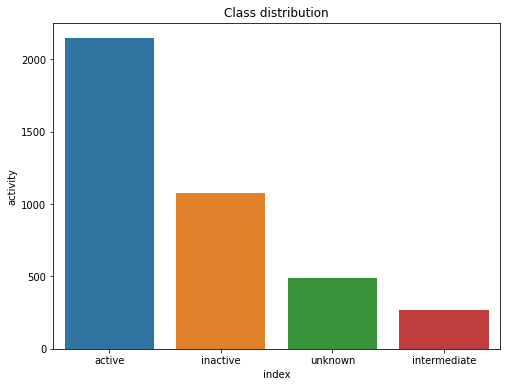

In [ ]:
# Checking class distribution of training data

classes_dist = train_labels["activity"].value_counts().reset_index()
plt.figure(figsize=(8,6))
chart = sns.barplot(x="index", y="activity", data=classes_dist)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title("Class distribution")

In [ ]:
!pip install 'git+https://github.com/lanpa/tensorboardX'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lanpa/tensorboardX to /tmp/pip-req-build-7u113b_p
  Running command git clone --filter=blob:none --quiet https://github.com/lanpa/tensorboardX /tmp/pip-req-build-7u113b_p
  Resolved https://github.com/lanpa/tensorboardX to commit ceabb20143e99436a7622520c58641f82eb1d3ca
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Graph convolution model
import torch_geometric.nn as pyg_nn
# Graph utility function
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch
import torch.optim as optim

# 사용할 데이터셋
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader

import torch_geometric.transforms as T

from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Define the number of atom features
num_atom_features = 100

def create_graph(smiles, label):
    mol = Chem.MolFromSmiles(smiles)
    num_atoms = mol.GetNumAtoms()
    edge_index = []
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        edge_index.append([u, v])
        edge_index.append([v, u])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.zeros((num_atoms, num_atom_features))
    for i, atom in enumerate(mol.GetAtoms()):
        x[i, atom.GetAtomicNum()] = 1

    y = torch.tensor([label], dtype=torch.long)
    data = Data( edge_index=edge_index,x=x,y=y)
    return data


In [ ]:
# #convert labels into integer encodings
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tra_labels=le.fit_transform(tra_labels)
tes_labels = le.fit_transform(tes_labels)

tra_labels = list(tra_labels)
tes_labels = list(tes_labels)

train_data_list = [create_graph(train[i], tra_labels[i]) for i in range(len(train))]
test_data_list = [create_graph(test[i], tes_labels[i]) for i in range(len(test))]
total_data_list=train_data_list+test_data_list

Minum Index of Class:  0
Maxium Index of Class:  3


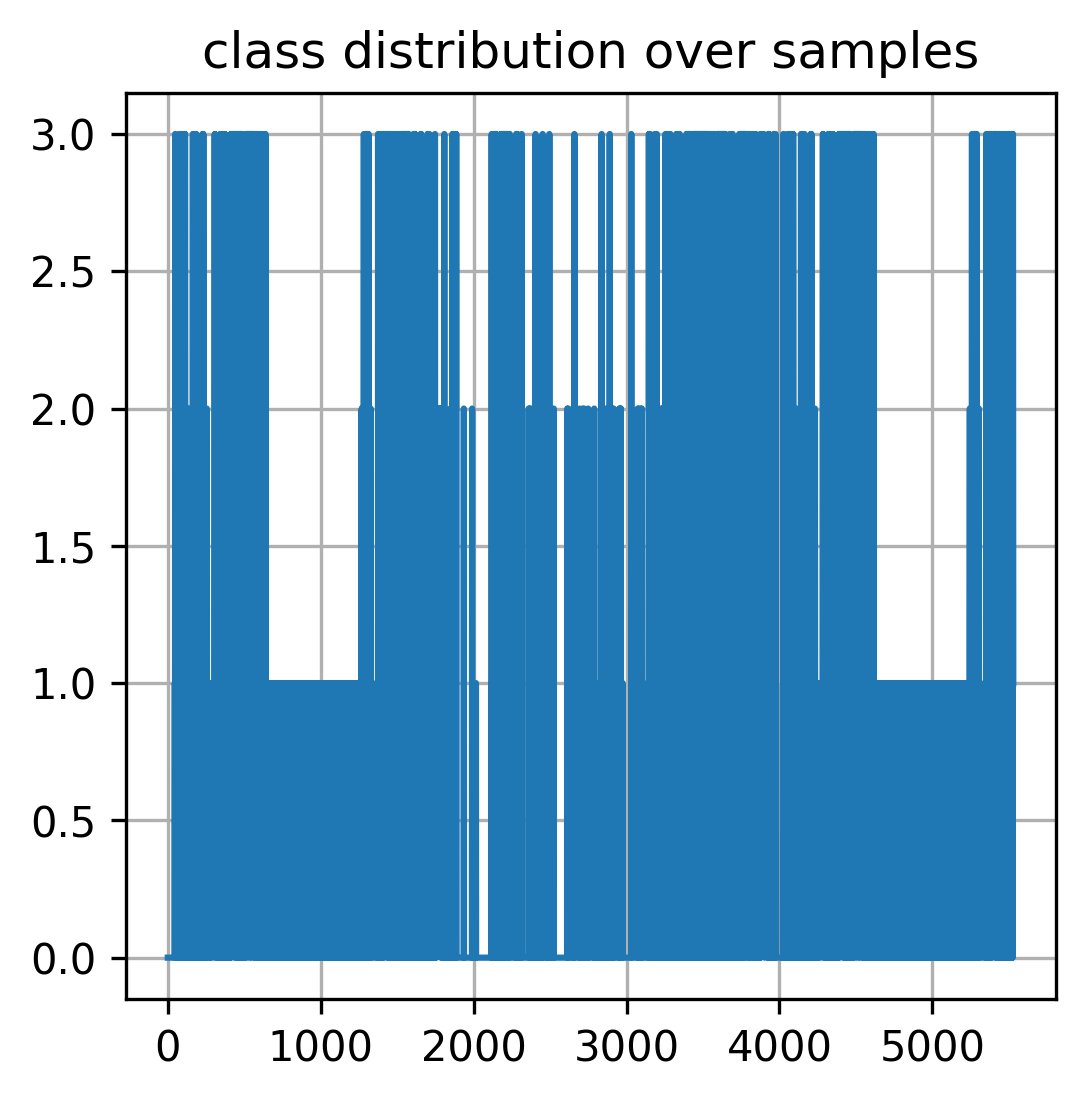

In [ ]:
total_data_list[1000]

yer=[]
for iter in range(len(total_data_list)):
  yer.append(total_data_list[iter].y.numpy()[0])

plt.figure(figsize=(4,4),dpi=300)
plt.plot(yer)
plt.title("class distribution over samples")
plt.grid()
print("Minum Index of Class: ",np.min(yer))
print("Maxium Index of Class: ",np.max(yer))

In [ ]:
# 이미 layer가 구현되어 있으므로, stacking만 하면 된다.
class GNNStack(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, task='node'):
        super(GNNStack, self).__init__() 
        self.task = task
        # ModuleList(): 각 레이어를 리스트에 전달하고 레이어의 iterator를 만든다. 
        self.convs = nn.ModuleList()    
        self.convs.append(self.build_conv_model(input_dim, hidden_dim))
        self.lns = nn.ModuleList()
        self.lns.append(nn.LayerNorm(hidden_dim))
 
        for l in range(2):
            self.convs.append(self.build_conv_model(hidden_dim, hidden_dim))

        # post-message-passing
        self.post_mp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim), nn.Dropout(0.25), 
            nn.Linear(hidden_dim, output_dim))
        if not (self.task == 'node' or self.task == 'graph'):
            raise RuntimeError('Unknown task.')

        self.dropout = 0.25
        self.num_layers = 3

    def build_conv_model(self, input_dim, hidden_dim):
        # refer to pytorch geometric nn module for different implementation of GNNs.
        if self.task == 'node': # node classification
            return pyg_nn.GCNConv(input_dim, hidden_dim)
        else: # graph convolution
            return pyg_nn.GINConv(nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                  nn.ReLU(), nn.Linear(hidden_dim, hidden_dim)))

    def forward(self, data):
        """
        x: feature matrix \in R ^(# of nodes \times d(embedding dimension))
        edge_index : sparse adjacency list
        ex) node1: [1,4,6]
        batch: batch마다 node의 개수가 다름. => 매우 복잡
        
        """ 
        x, edge_index, batch = data.x, data.edge_index, data.batch 
        if data.num_node_features == 0: # no features # feature가 없는 경우
            x = torch.ones(data.num_nodes, 1)

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index) # Modulelist # convolution layer
            emb = x  
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training) # testing에는 사용 x # nn.Dropout()을 사용하면 이럴 필요 없을텐데,, 굳이,,?
            # if not i == self.num_layers - 1:
            #     x = self.lns[i](x)
                
        # graph classification인 경우, pooling이 필요하므로 !!
        if self.task == 'graph':
            x = pyg_nn.global_mean_pool(x, batch) # max

        x = self.post_mp(x) # Sequential MLP

        return emb, F.log_softmax(x, dim=1) # emd: to visualize that graph looks like # F.lof_softmax: CROSS-ENTROPY를 위해

    def loss(self, pred, label):
        return F.nll_loss(pred, label) # nn.CrossEntropyLoss는 nn.LogSoftmax()와 nn.NLLLoss() # label: one-hot



class CustomConv(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(CustomConv, self).__init__(aggr='add')  # "Add" aggregation. # mean, max 등등
        self.lin = nn.Linear(in_channels, out_channels)
        self.lin_self = nn.Linear(in_channels, out_channels) # convolution

    def forward(self, x, edge_index):
        """
        Convolution을 위해서는 2가지가 필수적임.
        x has shape [N, in_channels] # feature matrix
        edge_index has shape [2, E] ==> connectivity ==> 2: (u, v)
        
        """


        # Add self-loops to the adjacency matrix.
        # A -> \tilde{A}
        # pyg_utils.add_self_loops(edge_index, num_nodes = x.size(0))  
        # neighbor 정보뿐만 아니라, 내 정보까지 add해야하므로 self-loops 추가! 
        
        # 지울수도 있다 !
        edge_index, _ = pyg_utils.remove_self_loops(edge_index)

        # Transform node feature matrix.
        self_x = self.lin_self(x) # B
        x = self.lin(x) # W
        
        
        # self_x: skip connection #compute message for all the nodes
        return self_x + self.propagate(edge_index, 
                                    size=(x.size(0), x.size(0)), x=x)

    def message(self, x_i, x_j, edge_index, size):
        # Compute messages
        # x_i is self-embedding
        # x_j has shape [E, out_channels]

        row, col = edge_index
        deg = pyg_utils.degree(row, size[0], dtype=x_j.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        return x_j
    
    def update(self, aggr_out):
        # aggr_out has shape [N, out_channels]
        F.normalize(aggr_out, p=2, dim=-1) # dim: 상황에 따라 알맞게 조정할 
        return aggr_out


def build_conv_model(self, input_dim, hidden_dim):
    # refer to pytorch geometric nn module for different implementation of GNNs.
    if self.task == 'node': # node classification
        return CustomConv(input_dim, hidden_dim)


def train(dataset, task):
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=64, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=64, shuffle=True)
    else:
        test_loader = loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # build model
    model = GNNStack(max(100, 1), 32, 4, task=task)
    opt = optim.Adam(model.parameters(), lr=0.01)
    
    # train
    for epoch in range(200):
        total_loss = 0
        model.train()
        for batch in loader:
            #print(batch.train_mask, '----')
            opt.zero_grad()
            embedding, pred = model(batch)
            label = batch.y
            if task == 'node':
                pred = pred[batch.train_mask]
                label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs ##
        total_loss /= len(loader.dataset)
        # writer.add_scalar("loss", total_loss, epoch) # tensorboard

        # if epoch % 10 == 0:
        test_acc = test(test_loader, model)
        print("Epoch {}. Loss: {:.4f}. Test accuracy: {:.4f}".format(
                epoch, total_loss, test_acc))

            # writer.add_scalar("test accuracy", test_acc, epoch) # tensorboard

    return model

def test(loader, model, is_validation=False):
    model.eval()

    correct = 0
    for data in loader:
        with torch.no_grad():
            emb, pred = model(data)
            pred = pred.argmax(dim=1)
            label = data.y

        if model.task == 'node':
            mask = data.val_mask if is_validation else data.test_mask
            # node classification: only evaluate on nodes in test set
            pred = pred[mask]
            label = data.y[mask]
            
        correct += pred.eq(label).sum().item()
    
    if model.task == 'graph':
        total = len(loader.dataset) 
    else:
        total = 0
        for data in loader.dataset:
            total += torch.sum(data.test_mask).item()
    return correct / total

dataset = total_data_list
task = 'graph'

model = train(dataset, task)

/usr/local/lib/python3.8/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0. Loss: 1.1574. Test accuracy: 0.3508
Epoch 1. Loss: 1.1538. Test accuracy: 0.3508
Epoch 2. Loss: 1.1473. Test accuracy: 0.3508
Epoch 3. Loss: 1.1461. Test accuracy: 0.3508
Epoch 4. Loss: 1.1471. Test accuracy: 0.3508
Epoch 5. Loss: 1.1469. Test accuracy: 0.3508
Epoch 6. Loss: 1.1482. Test accuracy: 0.3508
Epoch 7. Loss: 1.1566. Test accuracy: 0.3508
Epoch 8. Loss: 1.1471. Test accuracy: 0.3508
Epoch 9. Loss: 1.1456. Test accuracy: 0.3508
Epoch 10. Loss: 1.1386. Test accuracy: 0.3517
Epoch 11. Loss: 1.1354. Test accuracy: 0.3562
Epoch 12. Loss: 1.1192. Test accuracy: 0.3617
Epoch 13. Loss: 1.1129. Test accuracy: 0.3915
Epoch 14. Loss: 1.1030. Test accuracy: 0.3698
Epoch 15. Loss: 1.1045. Test accuracy: 0.3825
Epoch 16. Loss: 1.1021. Test accuracy: 0.3807
Epoch 17. Loss: 1.0978. Test accuracy: 0.3978
Epoch 18. Loss: 1.1030. Test accuracy: 0.3734
Epoch 19. Loss: 1.0963. Test accuracy: 0.3716
Epoch 20. Loss: 1.0990. Test accuracy: 0.3698
Epoch 21. Loss: 1.0876. Test accuracy: 0.387

KeyboardInterrupt: ignored